# PSYLIQ Tasks 

## DS (Python) Done any 2!
## DATA SCIENCE (PYTHON) ASSESSMENT QUESTIONS

## You need to download the Dummy Datasets for your analysis from the Internet!
### 1) Stock Prediction:
### Question: How can I predict the stock price of a company using LSTM( Long Short-Term Memory) in a Jupyter notebook or any other tool?

In [ ]:
### Note : Here im taking the dataset from kaggle.com - tesla stock price the link is giving below
dataset = https://www.kaggle.com/datasets/rpaguirre/tesla-stock-price

In [2]:
!pip install numpy pandas matplotlib tensorflow scikit-learn

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

#### Load and Preprocess Data:
Load the stock price dataset (e.g., Tesla) into a Pandas DataFrame. Ensure that the 'Date' column is in the datetime format. Normalize the data using Min-Max scaling:

In [4]:
# Load dataset
df = pd.read_csv('Tesla.csv')

In [5]:
df.head()

,Date,Open,High,Low,Close,Volume,Adj Close
0,6/29/2010,19.000000,25.00,17.540001,23.889999,18766300,23.889999
1,6/30/2010,25.790001,30.42,23.299999,23.830000,17187100,23.830000
2,7/1/2010,25.000000,25.92,20.270000,21.959999,8218800,21.959999
3,7/2/2010,23.000000,23.10,18.709999,19.200001,5139800,19.200001
4,7/6/2010,20.000000,20.00,15.830000,16.110001,6866900,16.110001


In [6]:
df.tail()

,Date,Open,High,Low,Close,Volume,Adj Close
1687,3/13/2017,244.820007,246.850006,242.779999,246.169998,3010700,246.169998
1688,3/14/2017,246.110001,258.119995,246.020004,258.000000,7575500,258.000000
1689,3/15/2017,257.000000,261.000000,254.270004,255.729996,4816600,255.729996
1690,3/16/2017,262.399994,265.750000,259.059998,262.049988,7100400,262.049988
1691,3/17/2017,264.000000,265.329987,261.200012,261.500000,6475900,261.500000


In [7]:
# Convert 'Date' to datetime
df['Date'] = pd.to_datetime(df['Date'])

In [8]:
df.head()

,Date,Open,High,Low,Close,Volume,Adj Close
0,2010-06-29,19.000000,25.00,17.540001,23.889999,18766300,23.889999
1,2010-06-30,25.790001,30.42,23.299999,23.830000,17187100,23.830000
2,2010-07-01,25.000000,25.92,20.270000,21.959999,8218800,21.959999
3,2010-07-02,23.000000,23.10,18.709999,19.200001,5139800,19.200001
4,2010-07-06,20.000000,20.00,15.830000,16.110001,6866900,16.110001


In [9]:
# Sort the dataframe by date
df = df.sort_values('Date')

In [11]:
# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
df_scaled = scaler.fit_transform(df['Close'].values.reshape(-1, 1))

#### Create Sequences:
Creating sequences of data for training the LSTM model. This involves splitting the data into input sequences and corresponding output (target) values:

In [13]:
# Function to create sequences
def create_sequences(data, seq_length):
    sequences = []
    targets = []
    for i in range(len(data) - seq_length):
        seq = data[i:i+seq_length]
        label = data[i+seq_length]
        sequences.append(seq)
        targets.append(label)
    return np.array(sequences), np.array(targets)

In [16]:
# Set sequence length
sequence_length = 10  # we can adjust this parameter

# Create sequences and targets
X, y = create_sequences(df_scaled, sequence_length)

#### Build LSTM Model:
Building and compile the LSTM model:

In [17]:
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(sequence_length, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

#### Train the Model: 
Training the LSTM model using the tesla data:

In [18]:
model.fit(X, y, epochs=50, batch_size=32)

Epoch 1/50
53/53 [==============================] - 4s 10ms/step - loss: 0.0865
Epoch 2/50
53/53 [==============================] - 1s 11ms/step - loss: 0.0015
Epoch 3/50
53/53 [==============================] - 0s 9ms/step - loss: 0.0010
Epoch 4/50
53/53 [==============================] - 0s 8ms/step - loss: 8.2215e-04
Epoch 5/50
53/53 [==============================] - 0s 7ms/step - loss: 7.6880e-04
Epoch 6/50
53/53 [==============================] - 0s 8ms/step - loss: 7.4115e-04
Epoch 7/50
53/53 [==============================] - 0s 8ms/step - loss: 6.8165e-04
Epoch 8/50
53/53 [==============================] - 0s 8ms/step - loss: 6.9040e-04
Epoch 9/50
53/53 [==============================] - 0s 9ms/step - loss: 6.4583e-04
Epoch 10/50
53/53 [==============================] - 1s 10ms/step - loss: 6.2522e-04
Epoch 11/50
53/53 [==============================] - 0s 9ms/step - loss: 6.2604e-04
Epoch 12/50
53/53 [==============================] - 1s 10ms/step - loss: 6.2780e-04
Epoch 13/

In [21]:
# Preparing test data
test_data = df_scaled[-sequence_length:].reshape(1, -1, 1)

In [22]:
# Making predictions
predicted_value = model.predict(test_data)

1/1 [==============================] - 0s 38ms/step


#### Inverse Transform:
Inversing transform the predicted values to get the actual stock prices:

In [23]:
predicted_price = scaler.inverse_transform(predicted_value.reshape(-1, 1))

#### Visualize Results: 
Visualizing the predicted and actual stock prices:

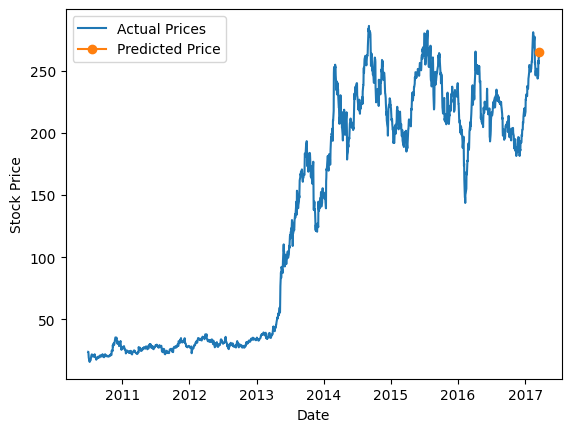

In [29]:
plt.plot(df['Date'], df['Close'], label='Actual Prices')
plt.plot(df['Date'].iloc[-1] + pd.DateOffset(1), predicted_price[0], marker='o', label='Predicted Price')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()